<a href="https://colab.research.google.com/github/kikiru328/LiveStock_Spark/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###### moduel import

In [ ]:
import os
from glob import glob
import json
from tqdm import tqdm

import shutil

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageFile
import cv2

# Json Test

In [ ]:
json_path = '/content/drive/MyDrive/Innopolis_spark/data/train/label/소_bbox'
labels = '/content/drive/MyDrive/Innopolis_spark/data/train/label/소_bbox/livestock_cow_bbox_012159.json'
print(labels)
imgs = '/content/drive/MyDrive/Innopolis_spark/data/train/img/소_bbox/livestock_cow_bbox_012159.jpg'
print(imgs)

/content/drive/MyDrive/Innopolis_spark/data/train/label/소_bbox/livestock_cow_bbox_012159.json
/content/drive/MyDrive/Innopolis_spark/data/train/img/소_bbox/livestock_cow_bbox_012159.jpg


In [ ]:
with open(labels,'r') as json_file:
    test_j = json.load(json_file)

In [ ]:
len(test_j['label_info']['annotations'])
test_j['label_info']['annotations']

[{'bbox': [1143, 486, 1319, 681], 'category_id': 1},
 {'bbox': [1241, 372, 1455, 541], 'category_id': 1},
 {'bbox': [1694, 484, 1911, 673], 'category_id': 1},
 {'bbox': [621, 418, 894, 595], 'category_id': 1},
 {'bbox': [528, 431, 653, 629], 'category_id': 1}]

In [ ]:
bboxs = []
for i in tqdm(range(len(test_j['label_info']['annotations']))):
    bboxs.append(test_j['label_info']['annotations'][i]['bbox'])
    

100%|██████████| 5/5 [00:00<00:00, 16565.18it/s]


In [ ]:
bboxs

[[1143, 486, 1319, 681],
 [1241, 372, 1455, 541],
 [1694, 484, 1911, 673],
 [621, 418, 894, 595],
 [528, 431, 653, 629]]

In [ ]:
L = [labels]
I = [imgs]

# Remove background FC

In [ ]:
# def rv_background(image,label):
#     for im,lab in tqdm(zip(image, label)):

#         img_ = cv2.imread(im)
#         img = cv2.cvtColor(img_, cv2.COLOR_BGR2RGB)

#         zero_img = np.zeros((img.shape[:2]),np.uint8)
#         with open(lab,'r') as json_file:
#             test_j = json.load(json_file)
#             coords = test_j['label_info']['annotations']
#             Bbox = []
#             for i in range(len(coords)):
#                 Bbox.append(coords[i]['bbox'])

#         for i in range(len(Bbox)):
#             f_point = Bbox[i][0], Bbox[i][1]
#             s_point = Bbox[i][2], Bbox[i][3]
#             mask = cv2.rectangle(zero_img, f_point, s_point, (255,0,0) ,-1)

#         result = cv2.bitwise_and(img,img,mask=mask)
#         return result

# Extraction_crop FC

In [ ]:
def extraction_crop(image,label,folder,animal):
    for im,lab in tqdm(zip(image,label)):
        img = Image.open(im)

    with open(lab,'r') as json_file:
        test_j = json.load(json_file)
        coords = test_j['label_info']['annotations']
        Bbox = []
        for i in range(len(coords)):
            Bbox.append(coords[i]['bbox'])

    for i in range(len(Bbox)):
        crop_img = img.crop((Bbox[i][0],Bbox[i][1],Bbox[i][2],Bbox[i][3]))
        crop_img.save(f'{folder}/{animal}/{i}.jpg')


    return crop_img


### Image Path

In [ ]:
train_imgs = glob('/content/drive/MyDrive/Innopolis_spark/chl/train/data/train/images/*.jpg')
test_imgs = glob('/content/drive/MyDrive/Innopolis_spark/chl/train/data/test/images/*.jpg')
val_imgs = glob('/content/drive/MyDrive/Innopolis_spark/chl/train/data/val/images/*.jpg')

### Label assemble

In [ ]:
train_labels = os.listdir('/content/drive/MyDrive/Innopolis_spark/chl/train/data/train/labels')
test_labels = os.listdir('/content/drive/MyDrive/Innopolis_spark/chl/train/data/test/labels')
val_labels = os.listdir('/content/drive/MyDrive/Innopolis_spark/chl/train/data/val/labels')

In [ ]:
org_train_pig_label = glob('/content/drive/MyDrive/Innopolis_spark/data/train/label/돼지_bbox/*.json')
org_train_cow_label = glob('/content/drive/MyDrive/Innopolis_spark/data/train/label/소_bbox/*.json')

org_val_pig_label = glob('/content/drive/MyDrive/Innopolis_spark/data/val/label/돼지_bbox/*.json')
org_val_cow_label = glob('/content/drive/MyDrive/Innopolis_spark/data/val/label/소_bbox/*.json')

In [ ]:
Validation_pig = os.listdir('/content/drive/MyDrive/Innopolis_spark/data/val/img/돼지_bbox')
len(Validation_pig)

538

In [ ]:
Validation_cow = os.listdir('/content/drive/MyDrive/Innopolis_spark/data/val/img/소_bbox')
len(Validation_cow)

1520

In [ ]:
print(len(train_labels))
print(len(test_labels))
print(len(val_labels))

print()

print(len(org_train_pig_label))
print(len(org_train_cow_label))
print(len(org_val_pig_label))
print(len(org_val_cow_label))

#### json_txt

In [ ]:
train_labels_json = []
test_labels_json = []
val_labels_json = []
for i in tqdm(train_labels):
    train_labels_json.append(i.replace('txt','json'))

for i in tqdm(test_labels):
    test_labels_json.append(i.replace('txt','json'))
    
for i in tqdm(val_labels):
    val_labels_json.append(i.replace('txt','json'))

100%|██████████| 3291/3291 [00:00<00:00, 1403645.97it/s]


#### Json Result

In [ ]:
Train = []
Test = []
Val = []
Error = []

In [ ]:
for i in tqdm(train_labels_json):
    try:
        for j in org_train_pig_label:
            if i in j :
                Train.append(j)

        for k in org_train_cow_label:
            if i in k :
                Train.append(k)
                
        for l in org_val_pig_label:
            if i in l :
                Train.append(l)

        for m in org_val_cow_label:
            if i in m :
                Train.append(m)

    except Exception as e:
        print(e)
        Error.append(i)

In [ ]:
for i in tqdm(test_labels_json):
    try:
        for j in org_train_pig_label:
            if i in j :
                Test.append(j)

        for k in org_train_cow_label:
            if i in k :
                Test.append(k)
                
        for l in org_val_pig_label:
            if i in l :
                Test.append(l)

        for m in org_val_cow_label:
            if i in m :
                Test.append(m)

    except Exception as e:
        print(e)
        Error.append(i)

In [ ]:
for i in tqdm(val_labels_json):
    try:
        for j in org_train_pig_label:
            if i in j :
                Val.append(j)

        for k in org_train_cow_label:
            if i in k :
                Val.append(k)
                
        for l in org_val_pig_label:
            if i in l :
                Val.append(l)

        for m in org_val_cow_label:
            if i in m :
                Val.append(m)

    except Exception as e:
        print(e)
        Error.append(i)

100%|██████████| 3291/3291 [00:09<00:00, 343.38it/s]


In [ ]:
print(len(Train))
print(len(Test))
print(len(Val))

0
0
3291


In [ ]:
print(len(train_labels))
print(len(test_labels))
print(len(val_labels))

In [ ]:
Train = sorted(Train)
Test = sorted(Test)
Val = sorted(Val)

train_labels_json = sorted(train_labels_json)
test_labels_json = sorted(test_labels_json)
val_labels_json = sorted(val_labels_json)

train_imgs = sorted(train_imgs)
test_imgs = sorted(test_imgs)
val_imgs = sorted(val_imgs)

In [ ]:
train_imgs[0]

In [ ]:
Train[0]

In [ ]:
%cd /content/drive/MyDrive/Innopolis_spark/팡훈

/content/drive/MyDrive/Innopolis_spark/팡훈


In [ ]:
!mkdir './label'
!mkdir './label/train'
!mkdir './label/test'
!mkdir './label/val'

mkdir: cannot create directory ‘./label’: File exists
mkdir: cannot create directory ‘./label/train’: File exists
mkdir: cannot create directory ‘./label/test’: File exists


In [ ]:
Train = sorted(Train)
Test = sorted(Test)
Val = sorted(Val)

In [ ]:
Train[0]

In [ ]:
train_dsc = '/content/drive/MyDrive/Innopolis_spark/팡훈/label/train'
test_dsc = '/content/drive/MyDrive/Innopolis_spark/팡훈/label/test'
val_dsc = '/content/drive/MyDrive/Innopolis_spark/팡훈/label/val'

In [ ]:
for i in tqdm(Train):
    try:
        shutil.copy(i,train_dsc)
    except FileNotFoundError:
        shutil.copy(i.replace('train','val',train_dsc))

In [ ]:
for i in tqdm(Test):
    try:
        shutil.copy(i,test_dsc)
    except:
        shutil.copy(i.replace('train','val',test_dsc))

In [ ]:
for i in tqdm(Val):
    try:
        shutil.copy(i,val_dsc)
    except:
        shutil.copy(i.replace('train','val',val_dsc))

100%|██████████| 3291/3291 [00:19<00:00, 172.19it/s]


In [ ]:
len(os.listdir(val_dsc))

3291

# 순서확인

###### Train

In [ ]:
train_imgs = os.listdir('/content/drive/MyDrive/Innopolis_spark/chl/train/data/train/images')
train_labs = os.listdir('/content/drive/MyDrive/Innopolis_spark/팡훈/label/train')

print(len(train_imgs))
print(len(train_labs))

train_imgs = sorted(train_imgs)
train_labs = sorted(train_labs)


check_imgs = []
for img in train_imgs:
    check_imgs.append(img.split('.jpg')[0])


check_label = []
for label in train_labs:
    check_label.append(label.split('.json')[0])


check_imgs = sorted(check_imgs)
check_label = sorted(check_label)

print(check_imgs[0])
print(check_label[0])

print(check_imgs==check_label)

error = []
for lab in train_labs:
    if lab.replace('json','jpg') in train_imgs:
        pass
    else:
        error.append(lab)
        print(lab)

error_img = []
for imgs in train_imgs:
    if imgs.replace('jpg','json') in train_labs:
        pass
    else:
        error_img.append(imgs)
        print(imgs)

13163
13163
livestock_cow_bbox_000001
livestock_cow_bbox_000001
False
livestock_cow_bbox_008745.json
livestock_cow_bbox_008163.jpg


###### Test

In [ ]:
test_imgs = os.listdir('/content/drive/MyDrive/Innopolis_spark/chl/train/data/test/images')
test_labs = os.listdir('/content/drive/MyDrive/Innopolis_spark/팡훈/label/test')

print(len(test_imgs))
print(len(test_labs))

test_imgs = sorted(test_imgs)
test_labs = sorted(test_labs)


check_imgs = []
for img in test_imgs:
    check_imgs.append(img.split('.jpg')[0])


check_label = []
for label in test_labs:
    check_label.append(label.split('.json')[0])


check_imgs = sorted(check_imgs)
check_label = sorted(check_label)

print(check_imgs[0])
print(check_label[0])

print(check_imgs==check_label)

error = []
for lab in test_labs:
    if lab.replace('json','jpg') in test_imgs:
        pass
    else:
        error.append(lab)
        print(lab)

error_img = []
for imgs in test_imgs:
    if imgs.replace('jpg','json') in test_labs:
        pass
    else:
        error_img.append(imgs)
        print(imgs)

2058
2058
livestock_cow_bbox_006077
livestock_cow_bbox_006077
True


###### Val

In [ ]:
val_imgs = os.listdir('/content/drive/MyDrive/Innopolis_spark/chl/train/data/val/images')
val_labs = os.listdir('/content/drive/MyDrive/Innopolis_spark/팡훈/label/val')

print(len(val_imgs))
print(len(val_labs))

val_imgs = sorted(val_imgs)
val_labs = sorted(val_labs)


check_imgs = []
for img in val_imgs:
    check_imgs.append(img.split('.jpg')[0])


check_label = []
for label in val_labs:
    check_label.append(label.split('.json')[0])


check_imgs = sorted(check_imgs)
check_label = sorted(check_label)

print(check_imgs[0])
print(check_label[0])

print(check_imgs==check_label)

error = []
for lab in val_labs:
    if lab.replace('json','jpg') in val_imgs:
        pass
    else:
        error.append(lab)
        print(lab)

error_img = []
for imgs in val_imgs:
    if imgs.replace('jpg','json') in val_labs:
        pass
    else:
        error_img.append(imgs)
        print(imgs)

3291
3291
livestock_cow_bbox_011243
livestock_cow_bbox_011243
True


### change

In [ ]:
# livestock_cow_bbox_008745.json 
# livestock_cow_bbox_008163.jpg 

In [ ]:
train_cow_label_change = os.listdir('/content/drive/MyDrive/Innopolis_spark/data/train/label/소_bbox')
train_cow_image_change = os.listdir('/content/drive/MyDrive/Innopolis_spark/data/train/img/소_bbox')

In [ ]:
print('livestock_cow_bbox_008745.json' in train_labs) # 있음
print('livestock_cow_bbox_008745.jpg' in train_imgs) # 없음  --> (raw -> copy)

print('livestock_cow_bbox_008163.json' in train_labs) # 없음 --> (raw -> copy)
print('livestock_cow_bbox_008163.jpg' in train_imgs) # 있음

print('livestock_cow_bbox_008745.jpg' in train_cow_image_change) # 원본에도 없음 -- > json 제거
print('livestock_cow_bbox_008163.json' in train_cow_label_change)

True
False
False
True
False
True


In [ ]:
train_labs.remove('livestock_cow_bbox_008745.json')

In [ ]:
len(train_labs)

13162

In [ ]:
print('livestock_cow_bbox_008745.json' in train_labs) # 있음

False


In [ ]:
with open('/content/drive/MyDrive/Innopolis_spark/data/train/label/소_bbox/livestock_cow_bbox_008163.json','r') as json_file:
    A = json.load(json_file)
print(A)

{'label_info': {'image': {'file_name': 'livestock_cow_bbox_008163.jpg', 'width': 1920, 'height': 1080, 'farm_name': 'Yangpyeong', 'farm_env': 'open', 'time': 'daytime'}, 'annotations': [], 'categories': [{'supercategory': 'livestock_cow', 'id': 1, 'name': 'cattle'}, {'supercategory': 'livestock_cow', 'id': 2, 'name': 'nuptial'}, {'supercategory': 'livestock_cow', 'id': 3, 'name': 'calf'}]}}


In [ ]:
shutil.copy('/content/drive/MyDrive/Innopolis_spark/data/train/label/소_bbox/livestock_cow_bbox_008163.json',
            '/content/drive/MyDrive/Innopolis_spark/팡훈/label/train/livestock_cow_bbox_008163.json')

'/content/drive/MyDrive/Innopolis_spark/팡훈/label/train/livestock_cow_bbox_008163.json'

In [ ]:
!rm '/content/drive/MyDrive/Innopolis_spark/팡훈/label/train/livestock_cow_bbox_008745.json'

In [ ]:
train_imgs = os.listdir('/content/drive/MyDrive/Innopolis_spark/chl/train/data/train/images')
train_labs = os.listdir('/content/drive/MyDrive/Innopolis_spark/팡훈/label/train')

print(len(train_imgs))
print(len(train_labs))

train_imgs = sorted(train_imgs)
train_labs = sorted(train_labs)


check_imgs = []
for img in train_imgs:
    check_imgs.append(img.split('.jpg')[0])


check_label = []
for label in train_labs:
    check_label.append(label.split('.json')[0])


check_imgs = sorted(check_imgs)
check_label = sorted(check_label)

print(check_imgs[0])
print(check_label[0])

print(check_imgs==check_label)

error = []
for lab in train_labs:
    if lab.replace('json','jpg') in train_imgs:
        pass
    else:
        error.append(lab)
        print(lab)

error_img = []
for imgs in train_imgs:
    if imgs.replace('jpg','json') in train_labs:
        pass
    else:
        error_img.append(imgs)
        print(imgs)

13163
13163
livestock_cow_bbox_000001
livestock_cow_bbox_000001
True


# [런타임 끊기면 여기서부터]

In [ ]:
import os
from glob import glob
import json
from tqdm import tqdm

import shutil

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageFile
import cv2

# Re check

In [ ]:
train_imgs = os.listdir('/content/drive/MyDrive/Innopolis_spark/chl/train/data/train/images')
train_labs = os.listdir('/content/drive/MyDrive/Innopolis_spark/팡훈/label/train')

print(len(train_imgs))
print(len(train_labs))

train_imgs = sorted(train_imgs)
train_labs = sorted(train_labs)


check_imgs = []
for img in train_imgs:
    check_imgs.append(img.split('.jpg')[0])


check_label = []
for label in train_labs:
    check_label.append(label.split('.json')[0])


check_imgs = sorted(check_imgs)
check_label = sorted(check_label)

print(check_imgs[0])
print(check_label[0])

print(check_imgs==check_label)

error = []
for lab in train_labs:
    if lab.replace('json','jpg') in train_imgs:
        pass
    else:
        error.append(lab)
        print(lab)

error_img = []
for imgs in train_imgs:
    if imgs.replace('jpg','json') in train_labs:
        pass
    else:
        error_img.append(imgs)
        print(imgs)



print(train_imgs[8000])
print(train_labs[8000])

13163
13163
livestock_cow_bbox_000001
livestock_cow_bbox_000001
True
livestock_cow_bbox_009522.jpg
livestock_cow_bbox_009522.json


In [ ]:
test_imgs = os.listdir('/content/drive/MyDrive/Innopolis_spark/chl/train/data/test/images')
test_labs = os.listdir('/content/drive/MyDrive/Innopolis_spark/팡훈/label/test')

print(len(test_imgs))
print(len(test_labs))

test_imgs = sorted(test_imgs)
test_labs = sorted(test_labs)


check_imgs = []
for img in test_imgs:
    check_imgs.append(img.split('.jpg')[0])


check_label = []
for label in test_labs:
    check_label.append(label.split('.json')[0])


check_imgs = sorted(check_imgs)
check_label = sorted(check_label)

print(check_imgs[0])
print(check_label[0])

print(check_imgs==check_label)

error = []
for lab in test_labs:
    if lab.replace('json','jpg') in test_imgs:
        pass
    else:
        error.append(lab)
        print(lab)

error_img = []
for imgs in test_imgs:
    if imgs.replace('jpg','json') in test_labs:
        pass
    else:
        error_img.append(imgs)
        print(imgs)


print(test_imgs[1150])
print(test_labs[1150])

2058
2058
livestock_cow_bbox_006077
livestock_cow_bbox_006077
True
livestock_cow_bbox_014063.jpg
livestock_cow_bbox_014063.json


In [ ]:
val_imgs = os.listdir('/content/drive/MyDrive/Innopolis_spark/chl/train/data/val/images')
val_labs = os.listdir('/content/drive/MyDrive/Innopolis_spark/팡훈/label/val')

print(len(val_imgs))
print(len(val_labs))

val_imgs = sorted(val_imgs)
val_labs = sorted(val_labs)


check_imgs = []
for img in val_imgs:
    check_imgs.append(img.split('.jpg')[0])


check_label = []
for label in val_labs:
    check_label.append(label.split('.json')[0])


check_imgs = sorted(check_imgs)
check_label = sorted(check_label)

print(check_imgs[0])
print(check_label[0])

print(check_imgs==check_label)

error = []
for lab in val_labs:
    if lab.replace('json','jpg') in val_imgs:
        pass
    else:
        error.append(lab)
        print(lab)

error_img = []
for imgs in val_imgs:
    if imgs.replace('jpg','json') in val_labs:
        pass
    else:
        error_img.append(imgs)
        print(imgs)


print(val_imgs[1150])
print(val_labs[1150])

3291
3291
livestock_cow_bbox_011243
livestock_cow_bbox_011243
True
livestock_cow_bbox_012393.jpg
livestock_cow_bbox_012393.json


# Crop

In [ ]:
#초기화
#shutil.rmtree('/content/individual_images')

In [ ]:
!mkdir '/content/individual_images'
!mkdir '/content/individual_images/train'
!mkdir '/content/individual_images/test'
!mkdir '/content/individual_images/val'

!mkdir '/content/individual_images/train/cow'
!mkdir '/content/individual_images/test/cow'
!mkdir '/content/individual_images/val/cow'

!mkdir '/content/individual_images/train/pig'
!mkdir '/content/individual_images/test/pig'
!mkdir '/content/individual_images/val/pig'


# extraction_crop FUNCTION

In [ ]:
def extraction_crop(image,label,folder_path,Error_imgs,Error_labs):
    for number,(im,lab) in enumerate(zip(image,label)):
        try:     
            img = Image.open(im)

            if 'cow' in im and lab:
                animal = 'cow'
            elif 'pig' in im and lab:
                animal = 'pig'

            fname = im.split('images/')[1].split('.jpg')[0]


            with open(lab,'r') as json_file:
                test_j = json.load(json_file)
                coords = test_j['label_info']['annotations']
                Bbox = []
                for i in range(len(coords)):
                    Bbox.append(coords[i]['bbox'])

            for i in range(len(Bbox)):
                crop_img = img.crop((Bbox[i][0],Bbox[i][1],Bbox[i][2],Bbox[i][3]))
                result = crop_img.resize((256,256))
                result.save(f'{folder_path}/{animal}/{fname}_{i}.jpg')

            print(f'{number} >>  {result.size} >>  {im}        >>>>>          [완료]')

        except Exception as e:
            print()
            print(' <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< ERROR >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> ')
            print(e)
            Error_imgs.append(im)
            Error_labs.append(lab)
            print(im)
            print(lab)
            print(' <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< ERROR >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> ')



 

### Test_TEST

In [ ]:
train_imgs = glob('/content/drive/MyDrive/Innopolis_spark/chl/train/data/train/images/*.jpg')
train_labs = glob('/content/drive/MyDrive/Innopolis_spark/팡훈/label/train/*.json')

train_imgs = sorted(train_imgs)
train_labs = sorted(train_labs)

In [ ]:
A_imgs = train_imgs[:10]
A_labs = train_labs[:10]

B_imgs = train_imgs[-10:]
B_labs = train_labs[-10:]

In [ ]:
!mkdir '/content/A'
!mkdir '/content/A/train'
!mkdir '/content/A/test'
!mkdir '/content/A/val'

!mkdir '/content/A/train/cow'
!mkdir '/content/A/test/cow'
!mkdir '/content/A/val/cow'

!mkdir '/content/A/train/pig'
!mkdir '/content/A/test/pig'
!mkdir '/content/A/val/pig'


In [ ]:
test_train_path = '/content/A/train'

In [ ]:
test_Error_imgs = []
test_Error_labs = []
extraction_crop(A_imgs,A_labs,test_train_path,test_Error_imgs,test_Error_labs)
extraction_crop(B_imgs,B_labs,test_train_path,test_Error_imgs,test_Error_labs)

0 >>  (256, 256) >>  /content/drive/MyDrive/Innopolis_spark/chl/train/data/train/images/livestock_cow_bbox_000001.jpg        >>>>>          [완료]
1 >>  (256, 256) >>  /content/drive/MyDrive/Innopolis_spark/chl/train/data/train/images/livestock_cow_bbox_000002.jpg        >>>>>          [완료]
2 >>  (256, 256) >>  /content/drive/MyDrive/Innopolis_spark/chl/train/data/train/images/livestock_cow_bbox_000003.jpg        >>>>>          [완료]
3 >>  (256, 256) >>  /content/drive/MyDrive/Innopolis_spark/chl/train/data/train/images/livestock_cow_bbox_000004.jpg        >>>>>          [완료]
4 >>  (256, 256) >>  /content/drive/MyDrive/Innopolis_spark/chl/train/data/train/images/livestock_cow_bbox_000005.jpg        >>>>>          [완료]
5 >>  (256, 256) >>  /content/drive/MyDrive/Innopolis_spark/chl/train/data/train/images/livestock_cow_bbox_000006.jpg        >>>>>          [완료]
6 >>  (256, 256) >>  /content/drive/MyDrive/Innopolis_spark/chl/train/data/train/images/livestock_cow_bbox_000007.jpg        >>>>>

##### Train


In [ ]:
train_imgs = glob('/content/drive/MyDrive/Innopolis_spark/chl/train/data/train/images/*.jpg')
train_labs = glob('/content/drive/MyDrive/Innopolis_spark/팡훈/label/train/*.json')

train_imgs = sorted(train_imgs)
train_labs = sorted(train_labs)

In [ ]:
print(train_imgs[0])
print(train_labs[0])

/content/drive/MyDrive/Innopolis_spark/chl/train/data/train/images/livestock_cow_bbox_000001.jpg
/content/drive/MyDrive/Innopolis_spark/팡훈/label/train/livestock_cow_bbox_000001.json


In [ ]:
print(len(train_imgs))
print(len(train_labs))

13163
13163


In [ ]:
train_save_path = '/content/individual_images/train'

In [ ]:
Error_imgs = []
Error_labs = []
extraction_crop(train_imgs,train_labs,train_save_path,Error_imgs,Error_labs)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
8163 >>  (256, 256) >>  /content/drive/MyDrive/Innopolis_spark/chl/train/data/train/images/livestock_cow_bbox_009685.jpg        >>>>>          [완료]
8164 >>  (256, 256) >>  /content/drive/MyDrive/Innopolis_spark/chl/train/data/train/images/livestock_cow_bbox_009686.jpg        >>>>>          [완료]
8165 >>  (256, 256) >>  /content/drive/MyDrive/Innopolis_spark/chl/train/data/train/images/livestock_cow_bbox_009687.jpg        >>>>>          [완료]
8166 >>  (256, 256) >>  /content/drive/MyDrive/Innopolis_spark/chl/train/data/train/images/livestock_cow_bbox_009688.jpg        >>>>>          [완료]
8167 >>  (256, 256) >>  /content/drive/MyDrive/Innopolis_spark/chl/train/data/train/images/livestock_cow_bbox_009689.jpg        >>>>>          [완료]
8168 >>  (256, 256) >>  /content/drive/MyDrive/Innopolis_spark/chl/train/data/train/images/livestock_cow_bbox_009690.jpg        >>>>>          [완료]
8169 >>  (256, 256) >>  /content/drive/MyDrive/Innopolis_spark/chl/train/dat

In [ ]:
train_cow = os.listdir('/content/individual_images/train/cow')
len(train_cow)

32147

In [ ]:
train_pig = os.listdir('/content/individual_images/train/pig')
len(train_pig)

37446

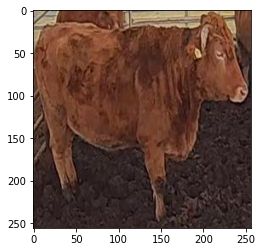

In [ ]:
plt.imshow(Image.open('/content/individual_images/train/cow/livestock_cow_bbox_009730_0.jpg'))

##### Test

In [ ]:
test_imgs = glob('/content/drive/MyDrive/Innopolis_spark/chl/train/data/test/images/*.jpg')
test_labs = glob('/content/drive/MyDrive/Innopolis_spark/팡훈/label/test/*.json')

test_imgs = sorted(test_imgs)
test_labs = sorted(test_labs)

In [ ]:
print(len(test_imgs))
print(len(test_labs))

2058
2058


In [ ]:
Error_imgs_test = []
Error_labs_test = []
extraction_crop(test_imgs,test_labs,'/content/individual_images/test',Error_imgs_test,Error_labs_test)

0 >>  (256, 256) >>  /content/drive/MyDrive/Innopolis_spark/chl/train/data/test/images/livestock_cow_bbox_006077.jpg        >>>>>          [완료]
1 >>  (256, 256) >>  /content/drive/MyDrive/Innopolis_spark/chl/train/data/test/images/livestock_cow_bbox_006078.jpg        >>>>>          [완료]
2 >>  (256, 256) >>  /content/drive/MyDrive/Innopolis_spark/chl/train/data/test/images/livestock_cow_bbox_006079.jpg        >>>>>          [완료]
3 >>  (256, 256) >>  /content/drive/MyDrive/Innopolis_spark/chl/train/data/test/images/livestock_cow_bbox_006080.jpg        >>>>>          [완료]
4 >>  (256, 256) >>  /content/drive/MyDrive/Innopolis_spark/chl/train/data/test/images/livestock_cow_bbox_006081.jpg        >>>>>          [완료]
5 >>  (256, 256) >>  /content/drive/MyDrive/Innopolis_spark/chl/train/data/test/images/livestock_cow_bbox_006082.jpg        >>>>>          [완료]
6 >>  (256, 256) >>  /content/drive/MyDrive/Innopolis_spark/chl/train/data/test/images/livestock_cow_bbox_006083.jpg        >>>>>       

In [ ]:
test_cow = os.listdir('/content/individual_images/test/cow')
print(len(test_cow))

test_pig = os.listdir('/content/individual_images/test/pig')
print(len(test_pig))

4931
5716


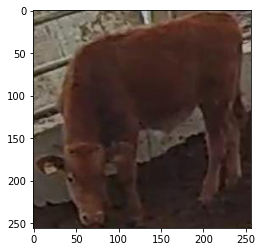

In [ ]:
test_cow[0]
plt.imshow(Image.open('/content/individual_images/test/cow/livestock_cow_bbox_006646_1.jpg'))

##### Val

In [ ]:
val_imgs = glob('/content/drive/MyDrive/Innopolis_spark/chl/train/data/val/images/*.jpg')
val_labs = glob('/content/drive/MyDrive/Innopolis_spark/팡훈/label/val/*.json')

val_imgs = sorted(val_imgs)
val_labs = sorted(val_labs)

In [ ]:
print(len(val_imgs))
print(len(val_labs))

3291
3291


In [ ]:
Error_imgs_val = []
Error_labs_val = []
extraction_crop(val_imgs,val_labs,'/content/individual_images/val',Error_imgs_val,Error_labs_val)

0 >>  (256, 256) >>  /content/drive/MyDrive/Innopolis_spark/chl/train/data/val/images/livestock_cow_bbox_011243.jpg        >>>>>          [완료]
1 >>  (256, 256) >>  /content/drive/MyDrive/Innopolis_spark/chl/train/data/val/images/livestock_cow_bbox_011244.jpg        >>>>>          [완료]
2 >>  (256, 256) >>  /content/drive/MyDrive/Innopolis_spark/chl/train/data/val/images/livestock_cow_bbox_011245.jpg        >>>>>          [완료]
3 >>  (256, 256) >>  /content/drive/MyDrive/Innopolis_spark/chl/train/data/val/images/livestock_cow_bbox_011246.jpg        >>>>>          [완료]
4 >>  (256, 256) >>  /content/drive/MyDrive/Innopolis_spark/chl/train/data/val/images/livestock_cow_bbox_011247.jpg        >>>>>          [완료]
5 >>  (256, 256) >>  /content/drive/MyDrive/Innopolis_spark/chl/train/data/val/images/livestock_cow_bbox_011248.jpg        >>>>>          [완료]
6 >>  (256, 256) >>  /content/drive/MyDrive/Innopolis_spark/chl/train/data/val/images/livestock_cow_bbox_011249.jpg        >>>>>          [완료]

In [ ]:
print(len(os.listdir('/content/individual_images/val/cow')))
print(len(os.listdir('/content/individual_images/val/pig')))

7787
8452


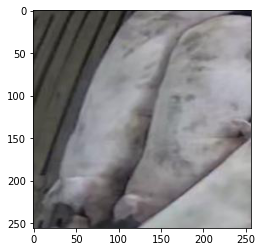

In [ ]:
plt.imshow(Image.open('/content/individual_images/val/pig/livestock_pig_bbox_004820_0.jpg'))

# ERRORS

In [47]:
Error_imgs_train = Error_imgs.copy()
Error_labs_train = Error_labs.copy()

In [50]:
print(len(Error_imgs_train))
print(len(Error_imgs_test))
print(len(Error_imgs_val))

print(len(Error_labs_train))
print(len(Error_labs_test))
print(len(Error_labs_val))

1
0
0
1
0
0


In [51]:
print(Error_imgs_train)
print(Error_labs_train)

['/content/drive/MyDrive/Innopolis_spark/chl/train/data/train/images/livestock_cow_bbox_000536.jpg']
['/content/drive/MyDrive/Innopolis_spark/팡훈/label/train/livestock_cow_bbox_000536.json']


In [52]:
!mkdir '/content/error'
!mkdir '/content/error/train'
!mkdir '/content/error/train/cow'
!mkdir '/content/error/train/pig'

In [53]:
error_save_path = '/content/error/train'

In [54]:
error_twice_img = []
error_twice_lab = []
extraction_crop(Error_imgs_train,Error_labs_train,error_save_path,error_twice_img,error_twice_lab)


 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< ERROR >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 
image file is truncated (28 bytes not processed)
/content/drive/MyDrive/Innopolis_spark/chl/train/data/train/images/livestock_cow_bbox_000536.jpg
/content/drive/MyDrive/Innopolis_spark/팡훈/label/train/livestock_cow_bbox_000536.json
 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< ERROR >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 


In [55]:
def extraction_crop(image,label,folder_path,Error_imgs,Error_labs):
    for number,(im,lab) in enumerate(zip(image,label)):
        try:     
            img = Image.open(im)

            if 'cow' in im and lab:
                animal = 'cow'
            elif 'pig' in im and lab:
                animal = 'pig'

            fname = im.split('images/')[1].split('.jpg')[0]


            with open(lab,'r') as json_file:
                test_j = json.load(json_file)
                coords = test_j['label_info']['annotations']
                Bbox = []
                for i in range(len(coords)):
                    Bbox.append(coords[i]['bbox'])

            for i in range(len(Bbox)):
                crop_img = img.crop((Bbox[i][0],Bbox[i][1],Bbox[i][2],Bbox[i][3]))
                result = crop_img.resize((256,256))
                result.save(f'{folder_path}/{animal}/{fname}_{i}.jpg')

            print(f'{number} >>  {result.size} >>  {im}        >>>>>          [완료]')

        except Exception as e:
            print()
            print(' <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< ERROR >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> ')
            print(e)
            Error_imgs.append(im)
            Error_labs.append(lab)
            print(im)
            print(lab)
            print(' <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< ERROR >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> ')
            print()
            
            ImageFile.LOAD_TRUNCATED_IMAGES = True
            
            img = Image.open(im)

            if 'cow' in im and lab:
                animal = 'cow'
            elif 'pig' in im and lab:
                animal = 'pig'

            fname = im.split('images/')[1].split('.jpg')[0]


            with open(lab,'r') as json_file:
                test_j = json.load(json_file)
                coords = test_j['label_info']['annotations']
                Bbox = []
                for i in range(len(coords)):
                    Bbox.append(coords[i]['bbox'])

            for i in range(len(Bbox)):
                crop_img = img.crop((Bbox[i][0],Bbox[i][1],Bbox[i][2],Bbox[i][3]))
                result = crop_img.resize((256,256))
                result.save(f'{folder_path}/{animal}/{fname}_{i}.jpg')

            print(f'{number} >>  {result.size} >>  {im}        >>>>>          [완료]')



In [56]:
error_twice_img = []
error_twice_lab = []
extraction_crop(Error_imgs_train,Error_labs_train,error_save_path,error_twice_img,error_twice_lab)


 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< ERROR >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 
image file is truncated (28 bytes not processed)
/content/drive/MyDrive/Innopolis_spark/chl/train/data/train/images/livestock_cow_bbox_000536.jpg
/content/drive/MyDrive/Innopolis_spark/팡훈/label/train/livestock_cow_bbox_000536.json
 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< ERROR >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 

0 >>  (256, 256) >>  /content/drive/MyDrive/Innopolis_spark/chl/train/data/train/images/livestock_cow_bbox_000536.jpg        >>>>>          [완료]


In [62]:
error_cow = glob('/content/error/train/cow/*.jpg')

for cow in error_cow:
    print(cow.split('cow/')[1])
    shutil.copy(cow,train_save_path+'/cow/'+cow.split('cow/')[1])

livestock_cow_bbox_000536_1.jpg
livestock_cow_bbox_000536_2.jpg
livestock_cow_bbox_000536_0.jpg


In [63]:
# before
print(len(train_cow))
print(len(train_pig))

32147
37446


In [65]:
# after
print(len(os.listdir(train_save_path+'/cow')))
print(len(os.listdir(train_save_path+'/pig')))

32150
37446


# 256 x 256 Labeling

In [68]:
""" 
256 x 256 yolo format coordinates

0.501953 0.501953 0.996094 0.996094


0 : pig
1 : cow

"""

' \n256 x 256 yolo format coordinates\n\n0.501953 0.501953 0.996094 0.996094\n\n\n0 : pig\n1 : cow\n\n'

In [69]:
test_yolo = open('/content/error/train/cow/classes.txt', 'w')
test_yolo.write('pig\ncow')
test_yolo.close()

In [85]:
!mkdir '/content/error/train/cow/label'

In [87]:
yolo_test_imgs = glob('/content/error/train/cow/*.jpg')
yolo_test_save_path = '/content/error/train/cow/label/'
for img in yolo_test_imgs:
    if 'pig' in img:
        animal_folder = 'pig'
        animal_number = 0

    elif 'cow' in img:
        animal_folder = 'cow'
        animal_number = 1
    # print(img)
    # print((yolo_test_save_path + img.split(animal_folder+'/')[1]).replace('jpg','txt'))
    f = open((yolo_test_save_path + img.split(animal_folder+'/')[1]).replace('jpg','txt'),'w')
    f.write(f'{animal_number} 0.501953 0.501953 0.996094 0.996094')
    f.close()

# Make Yolo_Labels Function


In [140]:
def mk_yolo(Image_list, yolo_save_folder_path, Error_img_list):
    for number, img in enumerate(Image_list):
        try:
            if 'pig' in img:
                animal_folder = 'pig'
                animal_number = 0

            elif 'cow' in img:
                animal_folder = 'cow'
                animal_number = 1

            # print(img)
            # print((yolo_save_folder_path + img.split(animal_folder+'/')[1]).replace('jpg','txt'))
            f = open((yolo_save_folder_path + img.split(animal_folder+'/')[1]).replace('jpg','txt'),'w')
            f.write(f'{animal_number} 0.501953 0.501953 0.996094 0.996094')
            f.close()

        except Exception as e:
                print()
                print(' <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< ERROR >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> ')
                print(e)
                Error_img_list.append(img)
                print(img)
                print(' <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< ERROR >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> ')
                print()

    print(f'{number} >>  {img} >>       >>>>>          [완료]')

##### Test

In [144]:
!mkdir '/content/error/train/cow/label'

In [145]:
yolo_test_imgs = glob('/content/error/train/cow/*.jpg')
yolo_save_path = '/content/error/train/cow/label/'
yolo_error_test = []
print(len(yolo_test_imgs))
mk_yolo(yolo_test_imgs,yolo_save_path,yolo_error_test)

3
2 >>  /content/error/train/cow/livestock_cow_bbox_000536_0.jpg >>       >>>>>          [완료]


# YOLO_LABEL

In [147]:
!mkdir '/content/individual_images/train/pig/label'
!mkdir '/content/individual_images/train/cow/label'

!mkdir '/content/individual_images/test/pig/label'
!mkdir '/content/individual_images/test/cow/label'

!mkdir '/content/individual_images/val/pig/label'
!mkdir '/content/individual_images/val/cow/label'

mkdir: cannot create directory ‘/content/individual_images/test/pig/label’: File exists
mkdir: cannot create directory ‘/content/individual_images/test/cow/label’: File exists
mkdir: cannot create directory ‘/content/individual_images/val/pig/label’: File exists
mkdir: cannot create directory ‘/content/individual_images/val/cow/label’: File exists


###### train

In [148]:
# points
mk_yolo_folder = 'train'
mk_yolo_animal = 'cow'

#check
print('저장폴더 >>> ' ,len(os.listdir(f'/content/individual_images/{mk_yolo_folder}/{mk_yolo_animal}/label')))

train_imgs = glob(f'/content/individual_images/{mk_yolo_folder}/{mk_yolo_animal}/*.jpg')
train_imgs = sorted(train_imgs)

train_imgs_yolo_save_path = f'/content/individual_images/{mk_yolo_folder}/{mk_yolo_animal}/label/'

train_yolo_error_imgs = []

print('IMG COUNT >>> ' ,len(train_imgs))
print()

저장폴더 >>>  0
IMG COUNT >>>  32150



In [149]:
mk_yolo(train_imgs,train_imgs_yolo_save_path,train_yolo_error_imgs)

32149 >>  /content/individual_images/train/cow/livestock_cow_bbox_011242_1.jpg >>       >>>>>          [완료]


In [150]:
#check
print('ERROR >>> ' ,train_yolo_error_imgs)
check_folder = glob(f'/content/individual_images/{mk_yolo_folder}/{mk_yolo_animal}/label/*.txt')
check_folder = sorted(check_folder)

check_txt = open(check_folder[0],'r')
line = check_txt.readline()
print('YOLO >>> ' ,line)
check_txt.close()

print('IMG COUNT >>> ' ,len(train_imgs))
print('LAB COUNT >>> ',len(check_folder))
print(train_imgs[0])
print(check_folder[0])

ERROR >>>  []
YOLO >>>  1 0.501953 0.501953 0.996094 0.996094
IMG COUNT >>>  32150
LAB COUNT >>>  32150
/content/individual_images/train/cow/livestock_cow_bbox_000001_0.jpg
/content/individual_images/train/cow/label/livestock_cow_bbox_000001_0.txt


In [151]:
# points
mk_yolo_folder = 'train'
mk_yolo_animal = 'pig'

#check
print('저장폴더 >>> ' ,len(os.listdir(f'/content/individual_images/{mk_yolo_folder}/{mk_yolo_animal}/label')))

train_imgs = glob(f'/content/individual_images/{mk_yolo_folder}/{mk_yolo_animal}/*.jpg')
train_imgs = sorted(train_imgs)

train_imgs_yolo_save_path = f'/content/individual_images/{mk_yolo_folder}/{mk_yolo_animal}/label/'

train_yolo_error_imgs = []

print('IMG COUNT >>> ' ,len(train_imgs))
print()

저장폴더 >>>  0
IMG COUNT >>>  37446



In [152]:
mk_yolo(train_imgs,train_imgs_yolo_save_path,train_yolo_error_imgs)

37445 >>  /content/individual_images/train/pig/livestock_pig_bbox_003980_9.jpg >>       >>>>>          [완료]


In [153]:
#check
print('ERROR >>> ' ,train_yolo_error_imgs)
check_folder = glob(f'/content/individual_images/{mk_yolo_folder}/{mk_yolo_animal}/label/*.txt')
check_folder = sorted(check_folder)

check_txt = open(check_folder[0],'r')
line = check_txt.readline()
print('YOLO >>> ' ,line)
check_txt.close()

print('IMG COUNT >>> ' ,len(train_imgs))
print('LAB COUNT >>> ',len(check_folder))
print(train_imgs[0])
print(check_folder[0])

ERROR >>>  []
YOLO >>>  0 0.501953 0.501953 0.996094 0.996094
IMG COUNT >>>  37446
LAB COUNT >>>  37446
/content/individual_images/train/pig/livestock_pig_bbox_000001_0.jpg
/content/individual_images/train/pig/label/livestock_pig_bbox_000001_0.txt


##### test

In [155]:
# points
mk_yolo_folder = 'test'
mk_yolo_animal = 'cow'

#check
print('저장폴더 >>> ' ,len(os.listdir(f'/content/individual_images/{mk_yolo_folder}/{mk_yolo_animal}/label')))

train_imgs = glob(f'/content/individual_images/{mk_yolo_folder}/{mk_yolo_animal}/*.jpg')
train_imgs = sorted(train_imgs)

train_imgs_yolo_save_path = f'/content/individual_images/{mk_yolo_folder}/{mk_yolo_animal}/label/'

train_yolo_error_imgs = []

print('IMG COUNT >>> ' ,len(train_imgs))
print()

저장폴더 >>>  0
IMG COUNT >>>  4931



In [156]:
mk_yolo(train_imgs,train_imgs_yolo_save_path,train_yolo_error_imgs)

4930 >>  /content/individual_images/test/cow/livestock_cow_bbox_014432_0.jpg >>       >>>>>          [완료]


In [157]:
#check
print('ERROR >>> ' ,train_yolo_error_imgs)
check_folder = glob(f'/content/individual_images/{mk_yolo_folder}/{mk_yolo_animal}/label/*.txt')
check_folder = sorted(check_folder)

check_txt = open(check_folder[0],'r')
line = check_txt.readline()
print('YOLO >>> ' ,line)
check_txt.close()

print('IMG COUNT >>> ' ,len(train_imgs))
print('LAB COUNT >>> ',len(check_folder))
print(train_imgs[0])
print(check_folder[0])

ERROR >>>  []
YOLO >>>  1 0.501953 0.501953 0.996094 0.996094
IMG COUNT >>>  4931
LAB COUNT >>>  4931
/content/individual_images/test/cow/livestock_cow_bbox_006077_0.jpg
/content/individual_images/test/cow/label/livestock_cow_bbox_006077_0.txt


In [158]:
# points
mk_yolo_folder = 'test'
mk_yolo_animal = 'pig'

#check
print('저장폴더 >>> ' ,len(os.listdir(f'/content/individual_images/{mk_yolo_folder}/{mk_yolo_animal}/label')))

train_imgs = glob(f'/content/individual_images/{mk_yolo_folder}/{mk_yolo_animal}/*.jpg')
train_imgs = sorted(train_imgs)

train_imgs_yolo_save_path = f'/content/individual_images/{mk_yolo_folder}/{mk_yolo_animal}/label/'

train_yolo_error_imgs = []

print('IMG COUNT >>> ' ,len(train_imgs))
print()

저장폴더 >>>  0
IMG COUNT >>>  5716



In [159]:
mk_yolo(train_imgs,train_imgs_yolo_save_path,train_yolo_error_imgs)

5715 >>  /content/individual_images/test/pig/livestock_pig_bbox_005110_8.jpg >>       >>>>>          [완료]


In [160]:
#check
print('ERROR >>> ' ,train_yolo_error_imgs)
check_folder = glob(f'/content/individual_images/{mk_yolo_folder}/{mk_yolo_animal}/label/*.txt')
check_folder = sorted(check_folder)

check_txt = open(check_folder[0],'r')
line = check_txt.readline()
print('YOLO >>> ' ,line)
check_txt.close()

print('IMG COUNT >>> ' ,len(train_imgs))
print('LAB COUNT >>> ',len(check_folder))
print(train_imgs[0])
print(check_folder[0])

ERROR >>>  []
YOLO >>>  0 0.501953 0.501953 0.996094 0.996094
IMG COUNT >>>  5716
LAB COUNT >>>  5716
/content/individual_images/test/pig/livestock_pig_bbox_002152_0.jpg
/content/individual_images/test/pig/label/livestock_pig_bbox_002152_0.txt


##### Val

In [161]:
# points
mk_yolo_folder = 'val'
mk_yolo_animal = 'cow'

#check
print('저장폴더 >>> ' ,len(os.listdir(f'/content/individual_images/{mk_yolo_folder}/{mk_yolo_animal}/label')))

train_imgs = glob(f'/content/individual_images/{mk_yolo_folder}/{mk_yolo_animal}/*.jpg')
train_imgs = sorted(train_imgs)

train_imgs_yolo_save_path = f'/content/individual_images/{mk_yolo_folder}/{mk_yolo_animal}/label/'

train_yolo_error_imgs = []

print('IMG COUNT >>> ' ,len(train_imgs))
print()

저장폴더 >>>  0
IMG COUNT >>>  7787



In [162]:
mk_yolo(train_imgs,train_imgs_yolo_save_path,train_yolo_error_imgs)

7786 >>  /content/individual_images/val/cow/livestock_cow_bbox_013672_2.jpg >>       >>>>>          [완료]


In [163]:
#check
print('ERROR >>> ' ,train_yolo_error_imgs)
check_folder = glob(f'/content/individual_images/{mk_yolo_folder}/{mk_yolo_animal}/label/*.txt')
check_folder = sorted(check_folder)

check_txt = open(check_folder[0],'r')
line = check_txt.readline()
print('YOLO >>> ' ,line)
check_txt.close()

print('IMG COUNT >>> ' ,len(train_imgs))
print('LAB COUNT >>> ',len(check_folder))
print(train_imgs[0])
print(check_folder[0])

ERROR >>>  []
YOLO >>>  1 0.501953 0.501953 0.996094 0.996094
IMG COUNT >>>  7787
LAB COUNT >>>  7787
/content/individual_images/val/cow/livestock_cow_bbox_011243_0.jpg
/content/individual_images/val/cow/label/livestock_cow_bbox_011243_0.txt


In [164]:
# points
mk_yolo_folder = 'val'
mk_yolo_animal = 'pig'

#check
print('저장폴더 >>> ' ,len(os.listdir(f'/content/individual_images/{mk_yolo_folder}/{mk_yolo_animal}/label')))

train_imgs = glob(f'/content/individual_images/{mk_yolo_folder}/{mk_yolo_animal}/*.jpg')
train_imgs = sorted(train_imgs)

train_imgs_yolo_save_path = f'/content/individual_images/{mk_yolo_folder}/{mk_yolo_animal}/label/'

train_yolo_error_imgs = []

print('IMG COUNT >>> ' ,len(train_imgs))
print()

저장폴더 >>>  0
IMG COUNT >>>  8452



In [165]:
mk_yolo(train_imgs,train_imgs_yolo_save_path,train_yolo_error_imgs)

8451 >>  /content/individual_images/val/pig/livestock_pig_bbox_004841_9.jpg >>       >>>>>          [완료]


In [166]:
#check
print('ERROR >>> ' ,train_yolo_error_imgs)
check_folder = glob(f'/content/individual_images/{mk_yolo_folder}/{mk_yolo_animal}/label/*.txt')
check_folder = sorted(check_folder)

check_txt = open(check_folder[0],'r')
line = check_txt.readline()
print('YOLO >>> ' ,line)
check_txt.close()

print('IMG COUNT >>> ' ,len(train_imgs))
print('LAB COUNT >>> ',len(check_folder))
print(train_imgs[0])
print(check_folder[0])

ERROR >>>  []
YOLO >>>  0 0.501953 0.501953 0.996094 0.996094
IMG COUNT >>>  8452
LAB COUNT >>>  8452
/content/individual_images/val/pig/livestock_pig_bbox_003981_0.jpg
/content/individual_images/val/pig/label/livestock_pig_bbox_003981_0.txt


# MOVE FOR TRAIN_YOLOV5

In [169]:
!mkdir '/content/for_train'
!mkdir '/content/for_train/train'
!mkdir '/content/for_train/test'
!mkdir '/content/for_train/val'

##### Train

In [170]:
# Label first
train_cow_label_folder = '/content/individual_images/train/cow/label'
dsc = '/content/for_train/train/label'
shutil.copytree(train_cow_label_folder,dsc)

'/content/for_train/train/label'

In [171]:
# Label first
train_pig_label_folder = '/content/individual_images/train/pig/label'
dsc = '/content/for_train/train/label'
shutil.copytree(train_pig_label_folder,dsc)

FileExistsError: ignored

In [ ]:
os.li